<a href="https://colab.research.google.com/github/furu-tuan-dong/CS112.L11.KHTN/blob/master/Week10/ReportWeek10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center"> <strong> CS112.L11.KHTN</h2>


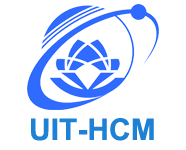
<h2 align="center"> <strong> Nhóm N002 - Phân tích và thiết kế thuật toán - Design and Analysic of Algorithms</h2>



| <h3>  Họ và tên  |   <h3>    MSSV       |  <h3>Vai trò  |
| :------------:|:-------------:|:-----:|
| <h3>Nguyễn Phúc Đạt | <h3>18520573  | <h3> Trưởng nhóm    |
| <h3>Đồng Quốc Tuấn  | <h3>18520185  | <h3>Thành viên |
| <h3>Huỳnh Minh Trí  | <h3>18520176  | <h3>Thành viên |


# BÀI TẬP 1


Đề bài: PHẦN THƯỞNG

Harry và Hermione thắng cuộc trong một trò chơi truyền hình và bây giờ là giai đoạn trao thưởng. Quy tắc trao thưởng là như sau: có n phần thưởng xếp thành một hàng dài, đánh số từ 1 đến n. Tùy thuộc vào số điểm đã đạt được của cặp chơi, người dẫn chương trình sẽ nói một số k (1 ≤ k ≤ n/3). Một người chơi sẽ chọn cho mình k phần thưởng xếp liên tiếp nhau, người thứ hai cũng sẽ chọn cho mình k phần thưởng xếp liên tiếp nhau trong số còn lại. Hermione là nữ nên được ưu tiên chọn trước.

Trò chơi đã kết thúc. Bây giờ không cần phải đồng tâm hiệp lực. Hermione vẫn còn rất giận Harry về một câu nói vô tâm mà chắc bây giờ Harry cũng không nhớ là mình nói cái gì và khi nào. Hermione hiểu rất rõ giá trị mỗi phần thưởng đối với Harry, cụ thể là phần thưởng thứ i sẽ có giá trị ai, i= 1 ÷ n và quyết định cách chọn của mình sao cho tổng giá trị phần thưởng mà Harry có thể đạt được càng nhỏ càng tốt. Về tổng giá trị phần thưởng của mình, Hermione không mảy may quan tâm!

Hãy xác định x – tổng nhỏ nhất giá trị phần thưởng mà Hermione có thể chọn để Harry không có cách chọn phần thưởng với tổng giá trị lớn hơn x.

Dữ liệu: Vào từ thiết bị nhập chuẩn:

Dòng đầu tiên chứa 2 số nguyên n và k (3 ≤ n ≤ 105, 1 ≤ k ≤ n/3),
Dòng thứ 2 chứa n số nguyên a1, a2, . . ., an (1 ≤ ai ≤ 109, i = 1 ÷ n).
Kết quả: Đưa ra thiết bị xuất chuẩn số nguyên x.

Ví dụ:

|INPUT|OUTPUT|
| :------------:|:-------------:|
|10 2|	7|
|1 2 4 5 2 4 2 2 1 6||

## 1. Abatraction
Cho N số nguyên dương $a_1,a_2,...,a_n$ và số nguyên K, hãy tìm đoạn con $b_i,b_i+1 ... b_i+k-1$ sao cho $ \sum_{i}^{i+k} b_i $ là lớn nhất sau khi bỏ đi 1 đoạn con khác độ dài K bất kì.

## 2. Pattern recognition

Ta định nghĩa mảng $f[i]$ là giá trị có tổng lớn nhất của $k$ phần tử liên tiếp trong đoạn $[1, i]$, tương tự với $g[i]$ là giá trị lớn nhất của $k$ phần tử liên tiếp trong đoạn $[i, n]$. Với mỗi đoạn mà Hermione chọn, ta cần tìm đáp án nhỏ nhất trong phương án mà Harry chọn (tổng lớn nhất của hai phần còn lại ~ $max(f[i], g[i + k - 1])$). $\rightarrow$ Độ phức tạp $O(N)$

## 3. Algorithm design

```
Input n, k
Input array a

Initialize array s
Initialize array f[i] = max(f[i-1], s[i] - s[i - k])
Initialize array g: g[i] = max(g[i+1], s[i + k - 1] - s[i - 1])

answer = +oo
for i from 1 to n :
    Harry_solution = max(f[i-1], g[i + k)
    answer = min(answer, Harry_solution)

output = answer
```

## 4. Programming

In [1]:
n, k = map(int,input().split())
a = list(map(int,input().split()))
a = [0] + a

# prefix sum
for i in range(1,n + 1):
	a[i] += a[i - 1]


# create list b 
b = [0 for _ in range(n - k + 3)]

m = n - k + 1
for i in range(1,n - k + 2):
	b[i] = a[i + k - 1] - a[i - 1]  

# max prefix
pre = [0 for _ in range(n - k + 3)]
for i in range(1,n - k + 2):
	pre[i] = max(b[i],pre[i - 1])

# max suffix
suff = [0 for _ in range(n - k + 3)]
for i in range(n - k  + 1,0,-1):
	suff[i] = max(b[i],suff[i + 1])

ans = 10**15
for i in range(1,m + 1):
	tmp = 0
	if i >= k: tmp = max(tmp,pre[i - k])
	if i + k <= m + 1: tmp = max(tmp,suff[i + k])
	ans = min(ans,tmp)

print(ans)

10 2
1 2 4 5 2 4 2 2 1 6	
7


## 5. Result on Wecode
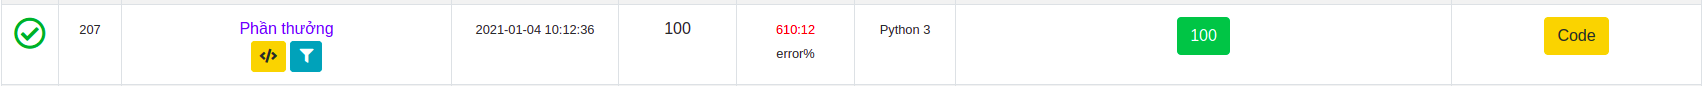

# BÀI TẬP 2


Đề bài: ĐÈN LED
Alice vừa hoàn thành một hợp đồng lắp bảng hiển thị số bằng đèn LED. Mỗi chữ số được hiển thị trong một khung chữ nhật với 7 ống đèn LED. Bằng cách bật các ống đèn LED thích hợp ta có thể hiển thị chữ số bất kỳ. Số đèn sáng càng nhiều thì việc hiển thị chữ số đó càng tốn năng lượng. Ví dụ, hiển thị chữ số 9 sẽ tốn năng lượng hơn hiển thị chữ số 7.


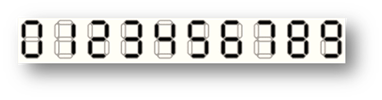


Sau khi bàn giao sản phẩm trong tay Alice còn thừa lại một số khá nhiều các khung hiển thị số và một cục pin nguồn. Dung lượng pin cho phép bật sáng n ống đèn LED. Alice muốn dùng pin bật đúng n ống đèn để hiển thị một số và số hiển thị được phải có tổng chữ số là lớn nhất.

Hãy xác định tổng lớn nhất của các chữ số của số có thể bật sáng.

Dữ liệu: Vào từ thiết bị nhập chuẩn gồm một dòng chứa số nguyên n (2 ≤ n ≤ 106).

Kết quả: Đưa ra thiết bị xuất chuẩn một số nguyên – tổng lớn nhất đạt được.

Ví dụ:

|INPUT|OUTPUT|
| :------------:|:-------------:|
|7|11|


## 1. Abstraction
Cho n que diêm, xác định tổng lớn nhất của các số được tạo từ n que diêm.



## 2. Pattern recognition

Dễ dang nhận thấy, chỉ với 3 que diêm ta được 1 số 7. Theo cảm giác thì số 7 có lẽ là lựa chọn tốt nhất để đầu tư que diêm cho nó, để đạt được tổng là lớn nhất.

Vậy thuật toán chúng ta sẽ "tham lam" lựa chọn càng nhiều số 7 càng tốt.

## 3. Algorithm design

Với n chia hết cho 3, tổng lớn nhất sẽ là $\frac{n}{3}*7$

Với n chia 3 dư 2, 2 que diêm dư ấy sẽ tạo thành số 1. Khi đó tổng lớn nhất sẽ là $\frac{n}{3}*7+1$

Với n chia 3 dư 1, 1 que diêm không thể tạo thành số gì. Vì vậy ta sẽ lấy bớt 3 diêm tạo thành số 7 để tạo thành số 4. Khi đó tổng lớn nhất sẽ là $\frac{n-3}{3}*7+4$

## 4. Programming



In [2]:
n = int(input())

mod = n%3
if mod == 1:
    print(7*(n//3 - 1) + 4)
elif mod == 0:
    print(7*(n//3))
elif mod == 2:
    print(7*(n//3) +  1)

7
11


## 5. Result on Wecode

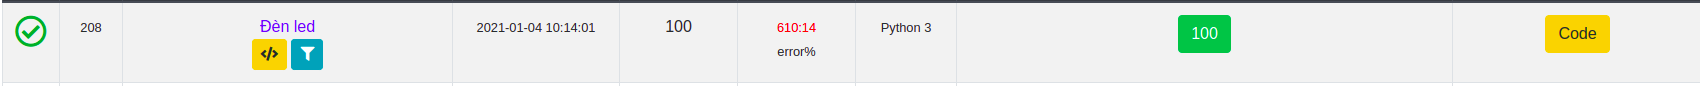